In [1]:
import pandas as pd
import numpy as np

import itertools

# Обучене модели и подготовка данных
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale, label_binarize
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, classification_report
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


# визуализация
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12,8)})

import warnings
warnings.filterwarnings('ignore')


def plot_confusion_matrix(X, Y, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    cm = confusion_matrix(Y, lr.predict(X))
    plt.figure(figsize=(10, 8))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # plt.savefig("conf_matrix.png")


def ro_curve(X, Y):
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(10, 8))
    fpr, tpr, thresholds = roc_curve(Y, lr.predict_proba(X)[:,1], pos_label=1)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')

In [2]:
data = pd.read_csv('credit.clean', sep='\t', index_col=None)
# CALC
X = data.loc[:, data.columns.difference(['TARGET'])]
y = data['TARGET'].values

feature_names = X.columns
# X = scale(X)
# X = X.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
score = []
for k in range(82, 200, 2):
    for i in range(69, 200, 2):
        rf = RandomForestClassifier(n_estimators=k, random_state=i, verbose=0, n_jobs=3)
        rf.fit(X_train, y_train)

        err_train = np.mean(y_train != rf.predict(X_train))
        err_test  = np.mean(y_test  != rf.predict(X_test))
        score.append([k, i, err_train, err_test])
score = pd.DataFrame(score, columns=['k', 'i', 'err_train', 'err_test'])
score[score['err_train']==0].sort_values(by='err_test', ascending=False)

,k,i,err_train,err_test
214,88,68,0.0,0.122213
199,86,68,0.0,0.122213
165,82,60,0.0,0.122014
169,82,68,0.0,0.122014
150,80,60,0.0,0.122014
154,80,68,0.0,0.122014
180,84,60,0.0,0.122014
193,84,86,0.0,0.121815
187,84,74,0.0,0.121815
182,84,64,0.0,0.121815


In [ ]:
# sns.lineplot(x="k", y="err_test", data=score)

In [4]:
# 0.0 0.12121815286624203

In [5]:
rf = RandomForestClassifier(n_estimators=84, random_state=70, verbose=0, n_jobs=3)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print (err_train, err_test)

0.0 0.1214171974522293


In [6]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# print(feature_names)

print("Feature importances:")
for f, idx in enumerate(indices):
#     if idx == 'AGREEMENT_RK':
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))
    
# Feature importances:
#  1. feature 'CREDIT' (0.1005)
#  2. feature 'FACT_LIVING_TERM' (0.0919)
#  3. feature 'FST_PAYMENT' (0.0895)
#  4. feature 'WORK_TIME' (0.0814)
#  5. feature 'PERSONAL_INCOME' (0.0811)
#  6. feature 'AGE  ' (0.0801)
#  7. feature 'LOAN_NUM_PAYM' (0.0565)
#  8. feature 'TERM ' (0.0489)
#  9. feature 'CHILD_TOTAL' (0.0348)
# 10. feature 'EDUCATION' (0.0341)
# 11. feature 'DEPENDANTS' (0.0285)
# 12. feature 'FAMILY_INCOME' (0.0225)
# 13. feature 'LOAN_NUM_CLOSED' (0.0204)
# 14. feature 'LOAN_MAX_DLQ_AMT' (0.0186)
# 15. feature 'LOAN_AVG_DLQ_AMT' (0.0185)
# 16. feature 'FACT_PHONE_FL' (0.0181)
# 17. feature 'GPF_DOCUMENT_FL' (0.0180)
# 18. feature 'GENDER' (0.0174)

Feature importances:
 1. feature 'CREDIT' (0.0971)
 2. feature 'FACT_LIVING_TERM' (0.0879)
 3. feature 'FST_PAYMENT' (0.0875)
 4. feature 'AGE  ' (0.0796)
 5. feature 'PERSONAL_INCOME' (0.0796)
 6. feature 'WORK_TIME' (0.0791)
 7. feature 'LOAN_NUM_PAYM' (0.0548)
 8. feature 'TERM ' (0.0470)
 9. feature 'EDUCATION' (0.0332)
10. feature 'CHILD_TOTAL' (0.0322)
11. feature 'DEPENDANTS' (0.0270)
12. feature 'MARITAL_STATUS' (0.0262)
13. feature 'FAMILY_INCOME' (0.0253)
14. feature 'LOAN_NUM_CLOSED' (0.0197)
15. feature 'FACT_PHONE_FL' (0.0178)
16. feature 'LOAN_AVG_DLQ_AMT' (0.0178)
17. feature 'GPF_DOCUMENT_FL' (0.0176)
18. feature 'LOAN_MAX_DLQ_AMT' (0.0173)
19. feature 'GENDER' (0.0158)
20. feature 'FL_PRESENCE_FL' (0.0156)
21. feature 'LOAN_NUM_TOTAL' (0.0135)
22. feature 'HS_PRESENCE_FL' (0.0135)
23. feature 'REG_FACT_POST_TP_FL' (0.0112)
24. feature 'OWN_AUTO' (0.0085)
25. feature 'REG_FACT_POST_FL' (0.0075)
26. feature 'LOAN_DLQ_NUM' (0.0070)
27. feature 'AUTO_RUS_FL' (0.0069)
28. f

['CREDIT' 'FACT_LIVING_TERM' 'FST_PAYMENT' 'AGE' 'PERSONAL_INCOME'
 'WORK_TIME' 'LOAN_NUM_PAYM' 'TERM' 'EDUCATION' 'CHILD_TOTAL' 'DEPENDANTS'
 'MARITAL_STATUS' 'FAMILY_INCOME' 'LOAN_NUM_CLOSED' 'FACT_PHONE_FL'
 'LOAN_AVG_DLQ_AMT' 'GPF_DOCUMENT_FL' 'LOAN_MAX_DLQ_AMT' 'GENDER'
 'FL_PRESENCE_FL' 'LOAN_NUM_TOTAL' 'HS_PRESENCE_FL' 'REG_FACT_POST_TP_FL'
 'OWN_AUTO' 'REG_FACT_POST_FL' 'LOAN_DLQ_NUM' 'AUTO_RUS_FL' 'REG_POST_FL'
 'REG_FACT_FL' 'PREVIOUS_CARD_NUM_UTILIZED' 'LAND_PRESENCE_FL'
 'REG_PHONE_FL' 'FACT_POST_FL' 'SOCSTATUS_PENS_FL' 'LOAN_MAX_DLQ'
 'ORG_TP_FCAPITAL' 'SOCSTATUS_WORK_FL' 'GAR_PRESENCE_FL' 'GEN_PHONE_FL'
 'COT_PRESENCE_FL']


(-1, 40)

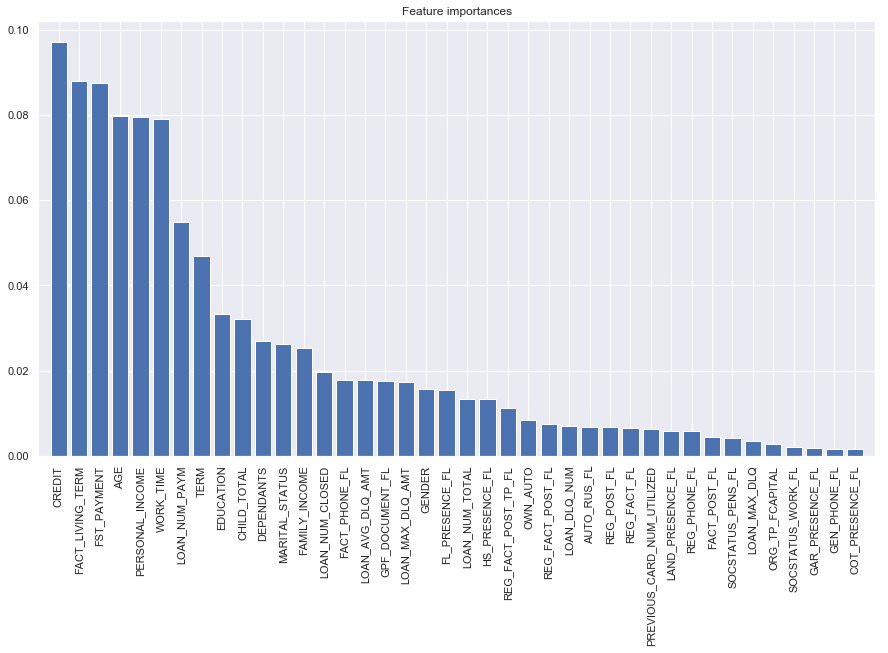

In [14]:
d_first = 40
plt.figure(figsize=(15, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
print(np.array(feature_names)[indices[:d_first]])
plt.xlim([-1, d_first])

In [18]:
# data.head()
df = data[['TARGET', 'CREDIT', 'FACT_LIVING_TERM', 'FST_PAYMENT', 'AGE', 'PERSONAL_INCOME',
'WORK_TIME', 'LOAN_NUM_PAYM', 'TERM', 'EDUCATION', 'CHILD_TOTAL', 'DEPENDANTS',
'MARITAL_STATUS', 'FAMILY_INCOME', 'LOAN_NUM_CLOSED', 'FACT_PHONE_FL',
'LOAN_AVG_DLQ_AMT', 'GPF_DOCUMENT_FL', 'LOAN_MAX_DLQ_AMT', 'GENDER',
'FL_PRESENCE_FL', 'LOAN_NUM_TOTAL', 'HS_PRESENCE_FL', 'REG_FACT_POST_TP_FL',
'OWN_AUTO', 'REG_FACT_POST_FL', 'LOAN_DLQ_NUM', 'AUTO_RUS_FL', 'REG_POST_FL',
'REG_FACT_FL', 'PREVIOUS_CARD_NUM_UTILIZED', 'LAND_PRESENCE_FL',
'REG_PHONE_FL', 'FACT_POST_FL', 'SOCSTATUS_PENS_FL', 'LOAN_MAX_DLQ',
'ORG_TP_FCAPITAL', 'SOCSTATUS_WORK_FL', 'GAR_PRESENCE_FL', 'GEN_PHONE_FL',
'COT_PRESENCE_FL']]